In [2]:
import xarray as xr
from xrspatial import slope
import numpy as np
import netCDF4
from matplotlib import pyplot as plt
import cartopy
import cartopy.crs as ccrs
import matplotlib.colors as mcolors
import iris
import iris.quickplot as qplt
import pandas as pd
from scipy import stats
import cartopy.feature as cfeature

In [2]:
d18O_last_sw = xr.open_dataarray('/data/keeling/a/anayrp2/CESM/d18O_last.nc')
salt_last_sw = xr.open_dataarray('/data/keeling/a/anayrp2/CESM/salt_last.nc')

In [3]:
d18O_mil = xr.open_dataarray('/data/keeling/a/anayrp2/CESM/d18O_mil.nc')
salt_mil = xr.open_dataarray('/data/keeling/a/anayrp2/CESM/salt_mil.nc')

In [4]:
salt_all = xr.concat([salt_mil, salt_last_sw], dim='time')
d18O_all = xr.concat([d18O_mil, d18O_last_sw], dim='time')

In [5]:
salt_all.load();
d18O_all.load();

In [6]:
d18O_all_mean = d18O_all.mean(dim = 'time')

In [7]:
salt_all_mean = salt_all.mean(dim = 'time')

In [8]:
d18O_a = d18O_all_mean.drop('ULONG')
d18O_b = d18O_a.drop('ULAT')

In [9]:
salt_a = salt_all_mean.drop('ULONG')
salt_b = salt_a.drop('ULAT')

In [10]:
salt_b.mean()

<xarray.DataArray 'SALT' ()>
array(33.980583, dtype=float32)
Coordinates:
    z_t      float32 500.0

/data/keeling/a/anayrp2/miniconda3/envs/paleo/lib/python3.9/site-packages/iris/analysis/cartography.py:633: UserWarning: Coordinate system of latitude and longitude coordinates is not specified. Assuming WGS84 Geodetic.
  warnings.warn(


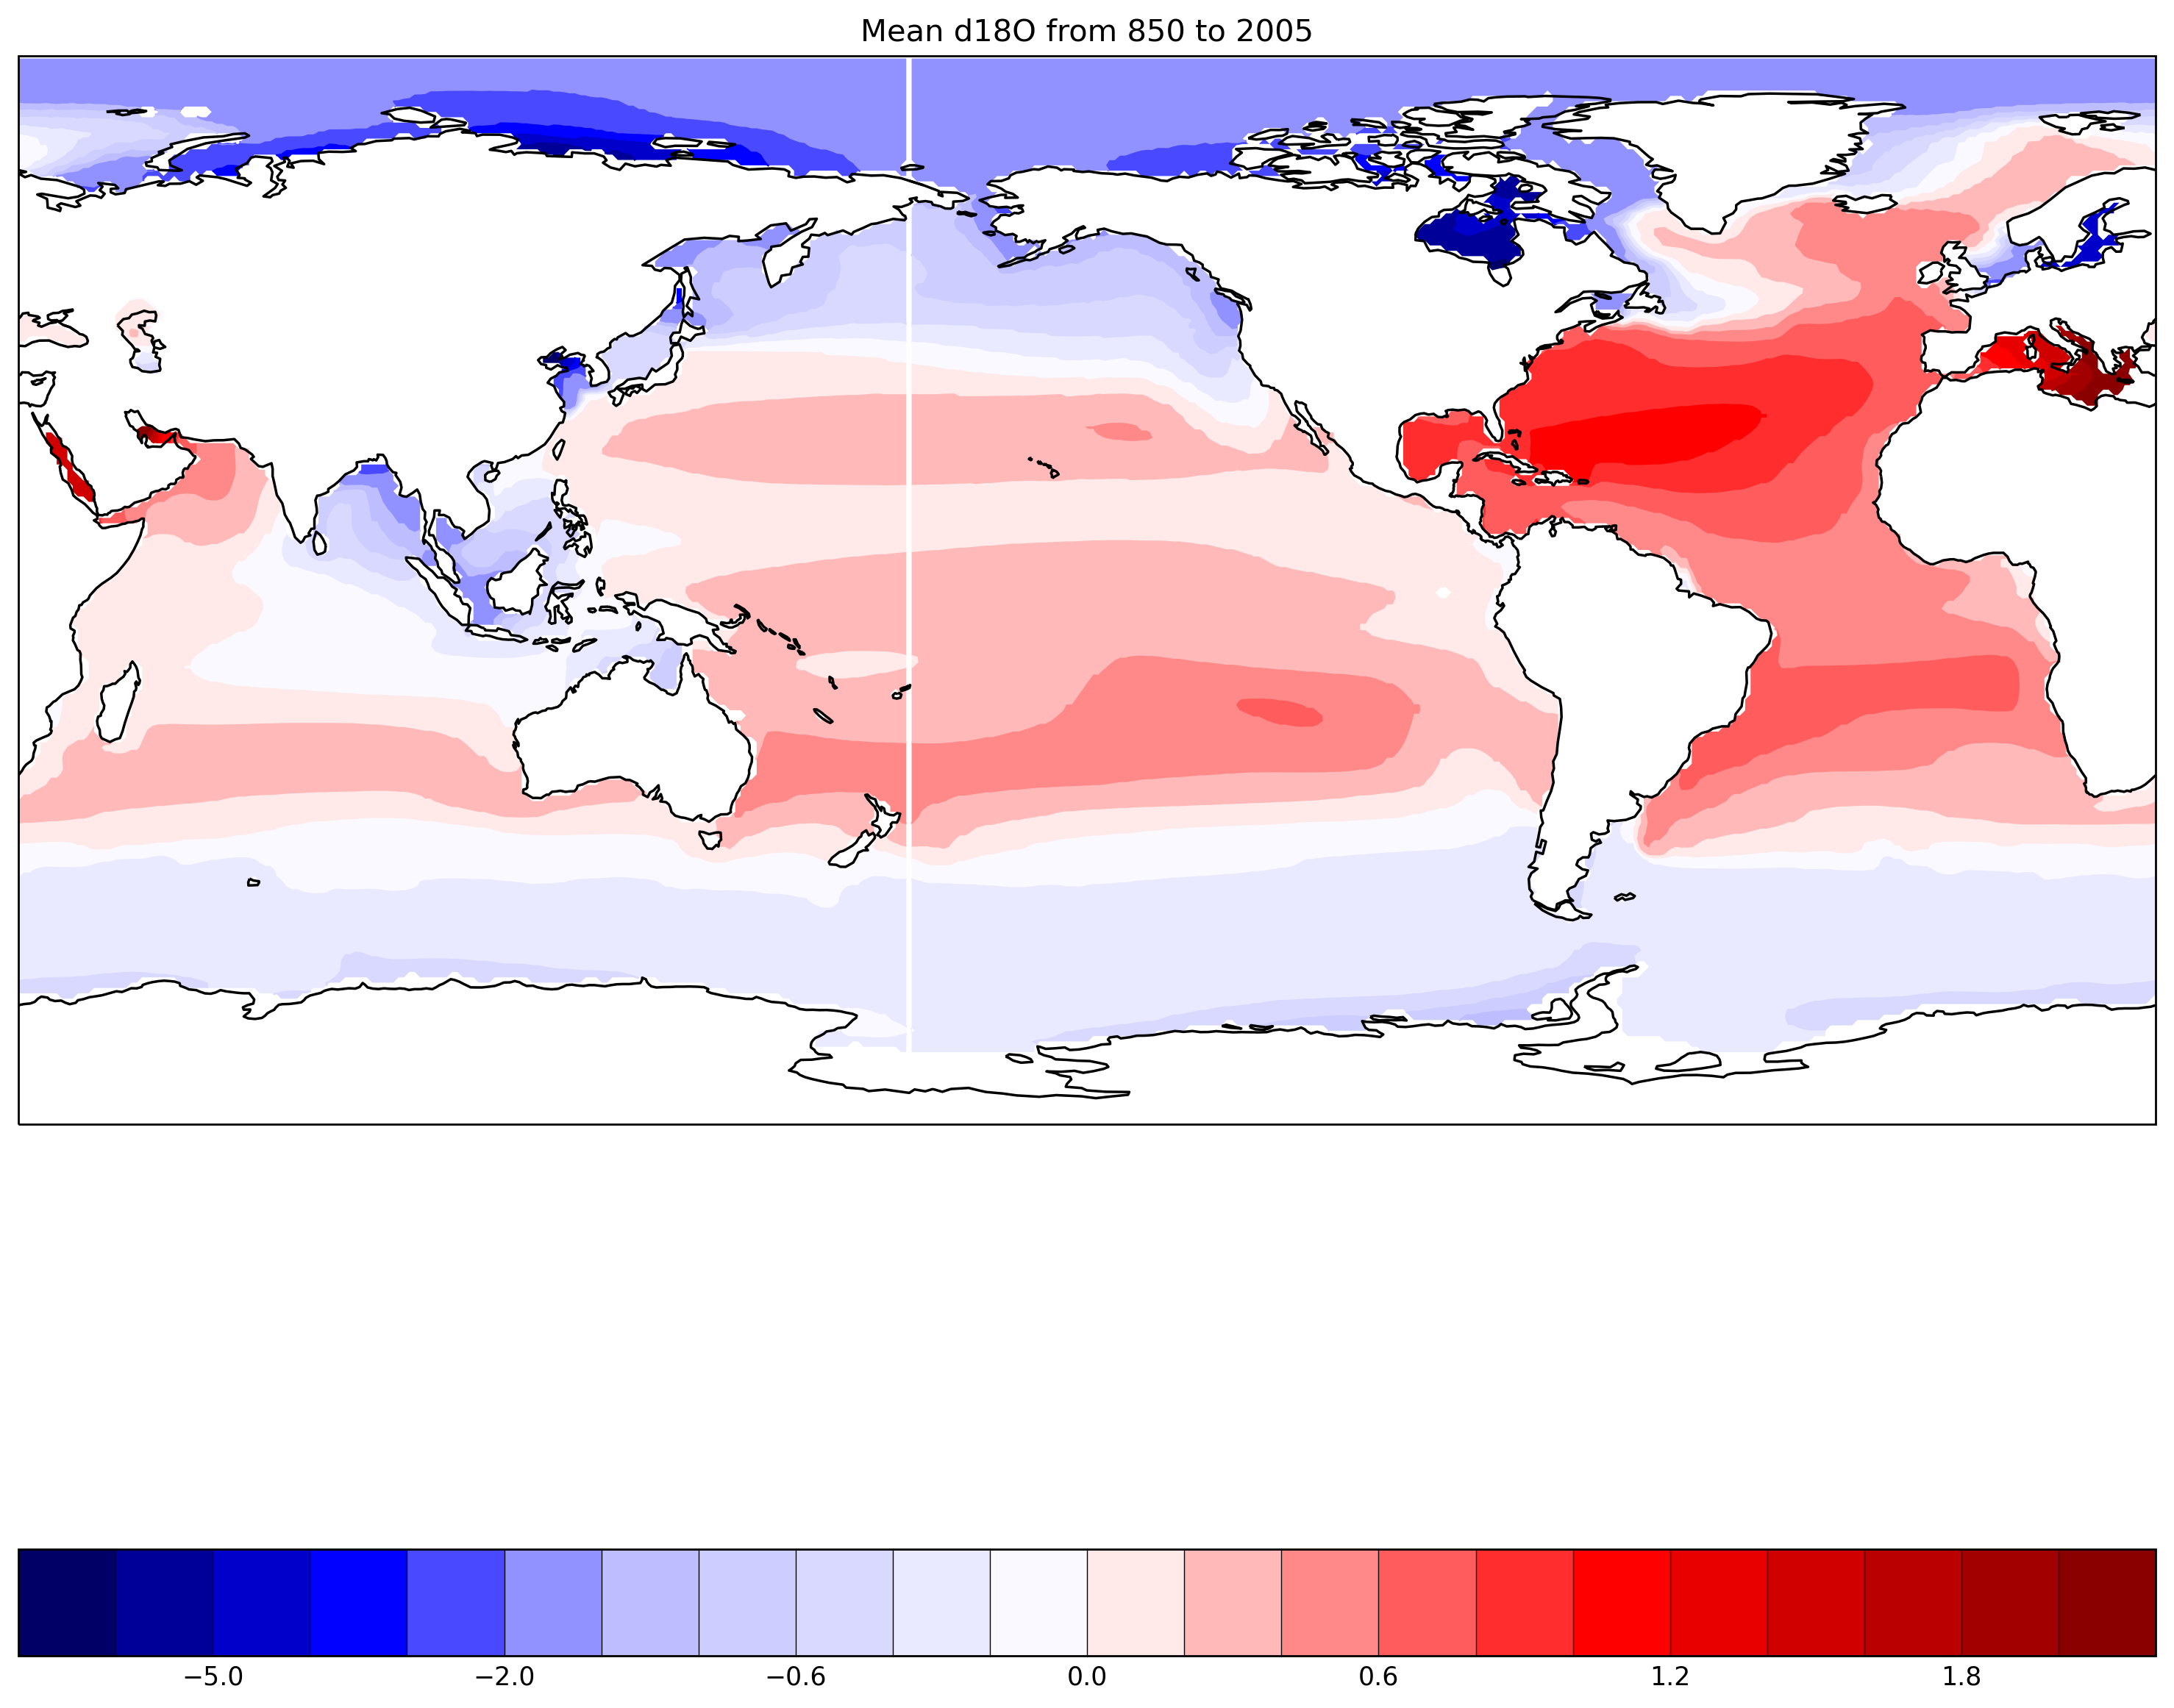

In [11]:
d18O_cube = d18O_b.to_iris()

pcarree = ccrs.PlateCarree()
new_cube, extent = iris.analysis.cartography.project(d18O_cube, pcarree,nx=400, ny=200)
fig = plt.figure(figsize=[15,20], dpi=250)
ax = plt.subplot(projection=ccrs.PlateCarree(central_longitude=-150.0))
ax.set_global()
ax.coastlines()
levels = [-7,-6, -5, -4 ,-3 ,-2, -1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2]
norm = mcolors.TwoSlopeNorm(vmin=levels[0], vmax=levels[-1], vcenter=0)

qplt.contourf(new_cube,cmap='seismic',levels=levels, norm=norm)
plt.title('Mean d18O from 850 to 2005')
plt.show()

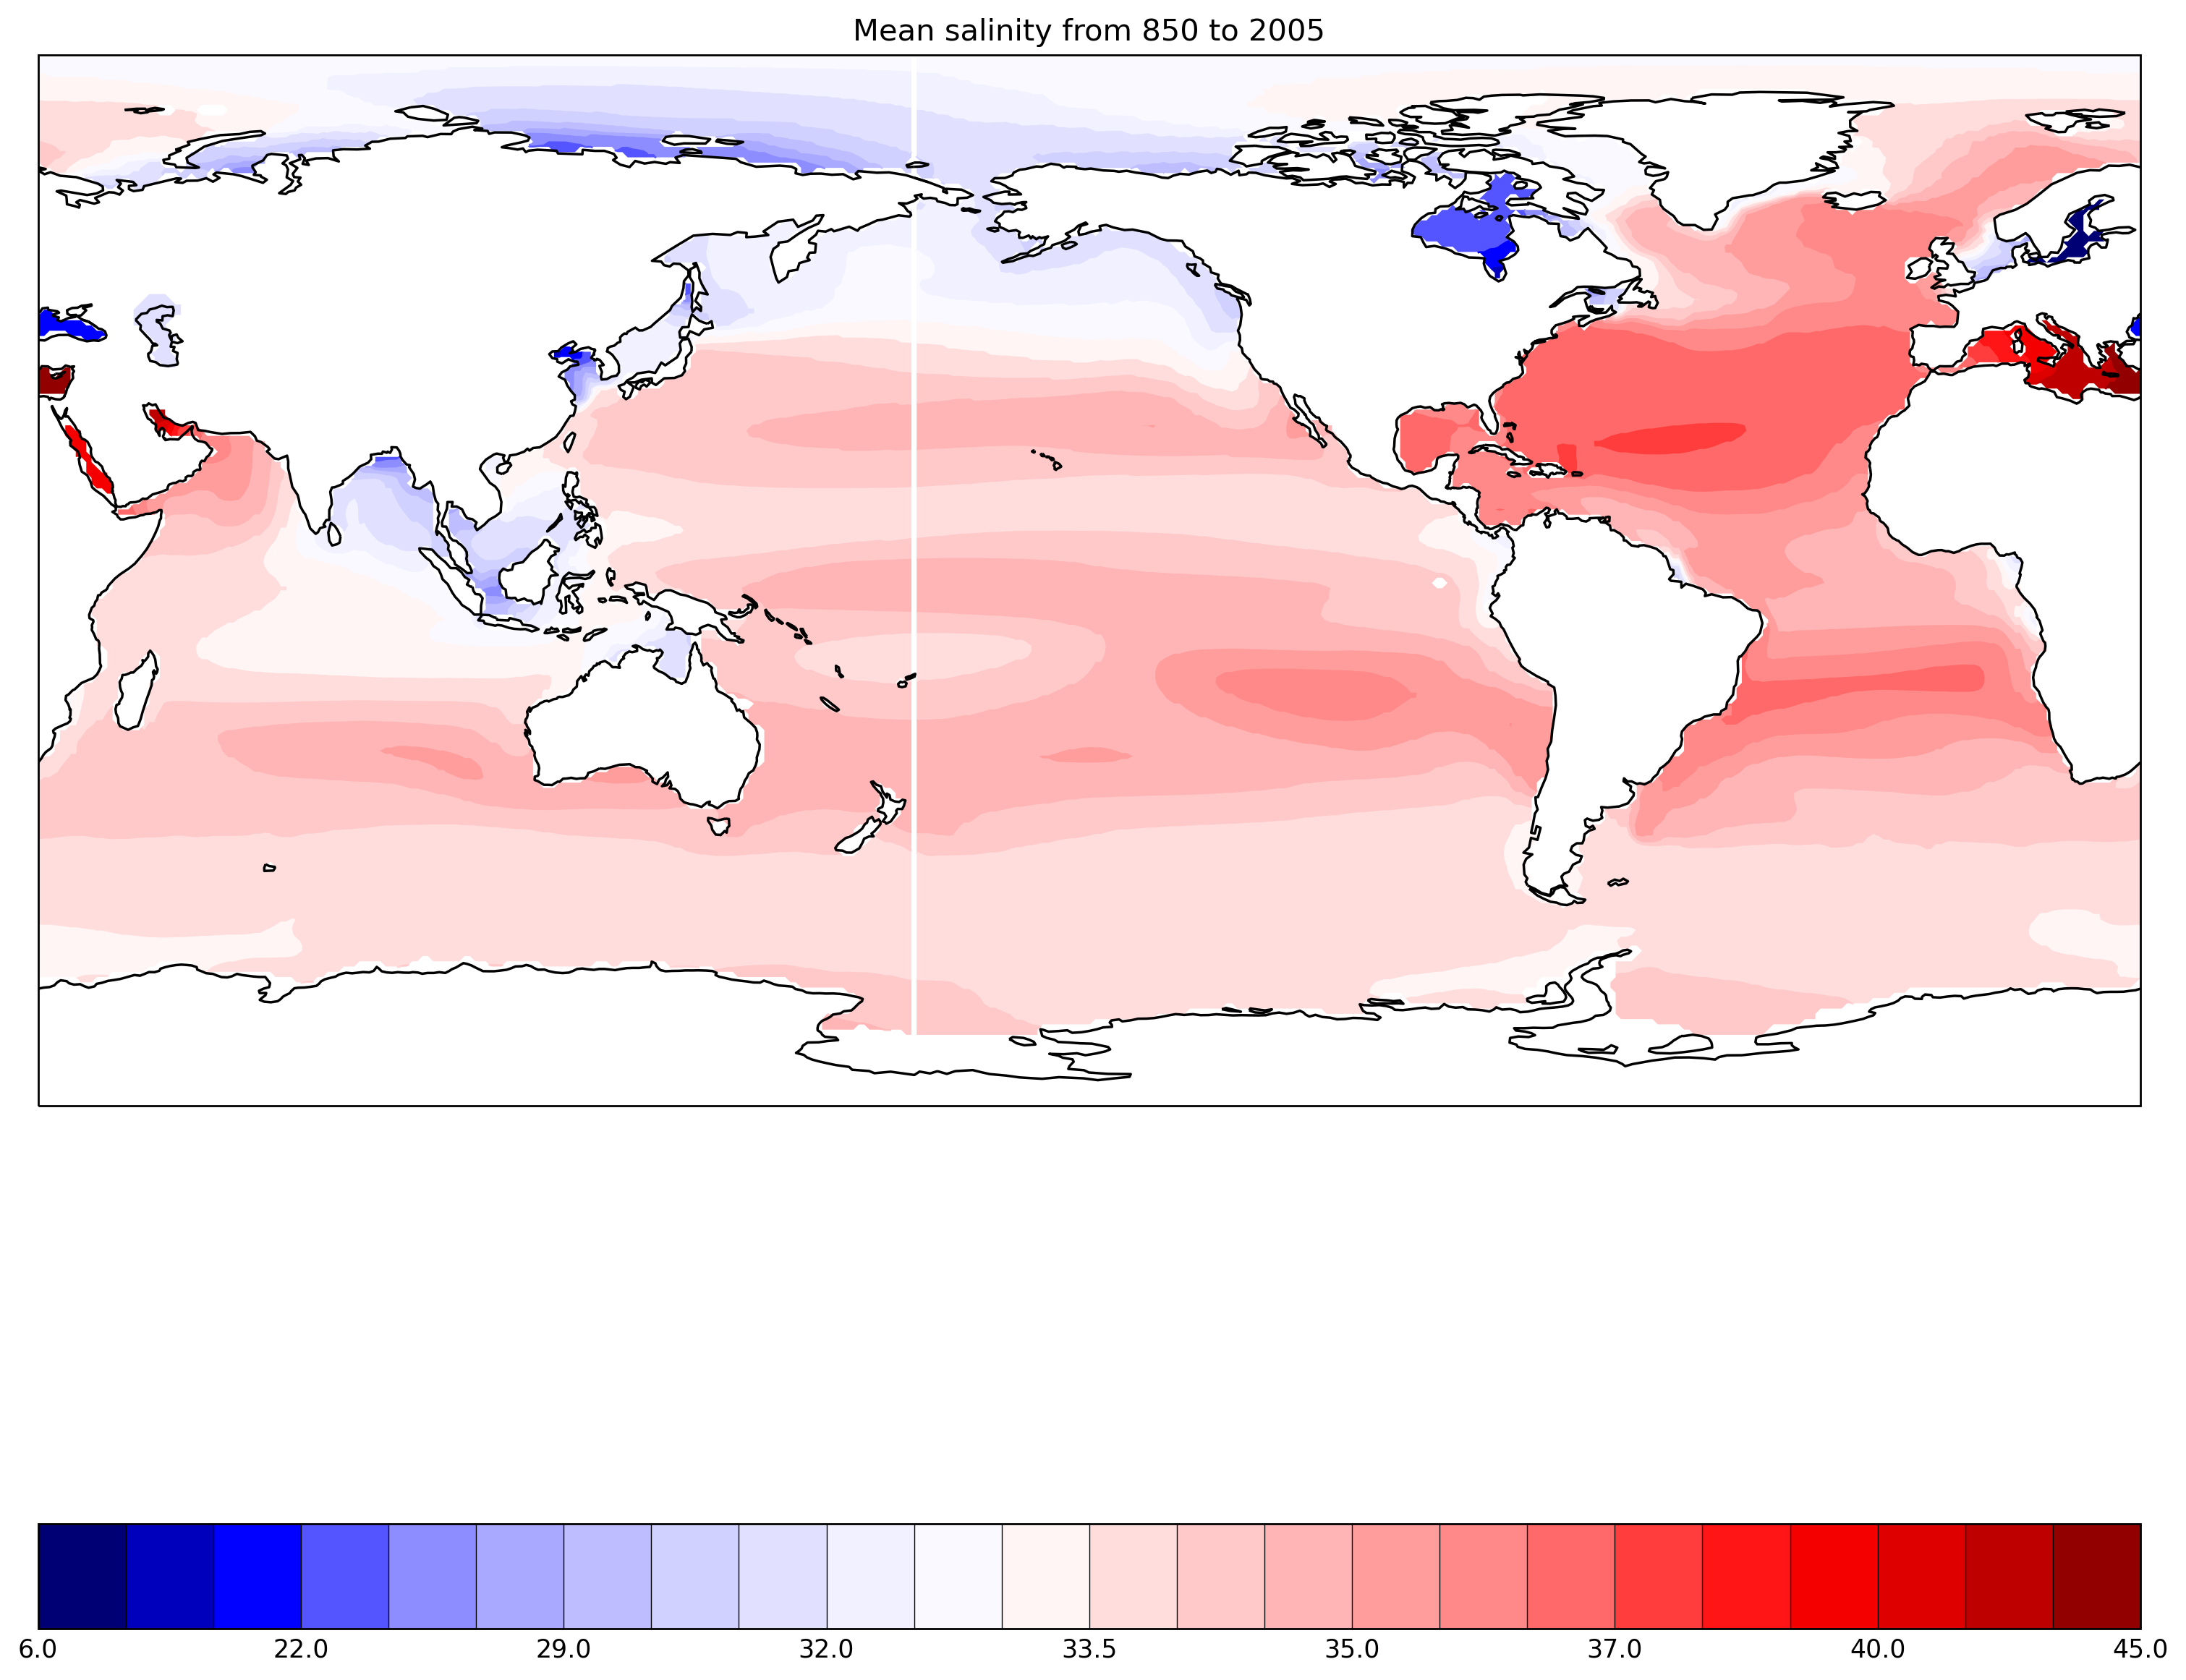

In [12]:
salt_cube = salt_b.to_iris()

pcarree = ccrs.PlateCarree()
new_cube, extent = iris.analysis.cartography.project(salt_cube, pcarree,nx=400, ny=200)
fig = plt.figure(figsize=[15,20], dpi=250)
ax = plt.subplot(projection=ccrs.PlateCarree(central_longitude=-150.0))
ax.set_global()
ax.coastlines()
levels = [6,12, 17, 22 ,26 ,28, 29, 30, 31, 32, 32.5, 33, 33.5, 34, 34.5, 35, 35.5, 36, 37,38,39,40,41,43,45]
norm = mcolors.TwoSlopeNorm(vmin=levels[0], vmax=levels[-1], vcenter=33)

qplt.contourf(new_cube,cmap='seismic',levels=levels, norm=norm)
#qplt.contourf(new_cube,cmap='BrBG')
plt.title('Mean salinity from 850 to 2005')
plt.show()

In [13]:
d18O_all_slope = d18O_all.polyfit(dim='time', deg =1)

In [49]:
d18O_all_slope.assign_coords({'TLAT':('nlat',d18O_all['TLAT'].values)})

ValueError: Could not convert tuple of form (dims, data[, attrs, encoding]): ('nlat', array([[-79.22052261, -79.22052261, -79.22052261, ..., -79.22052261,
        -79.22052261, -79.22052261],
       [-78.68630626, -78.68630626, -78.68630626, ..., -78.68630626,
        -78.68630626, -78.68630626],
       [-78.15208992, -78.15208992, -78.15208992, ..., -78.15208992,
        -78.15208992, -78.15208992],
       ...,
       [ 71.29031715,  71.29408252,  71.30160692, ...,  71.30160692,
         71.29408252,  71.29031716],
       [ 71.73524335,  71.73881845,  71.74596231, ...,  71.74596231,
         71.73881845,  71.73524335],
       [ 72.18597561,  72.18933231,  72.19603941, ...,  72.19603941,
         72.18933231,  72.18597562]])) to Variable.

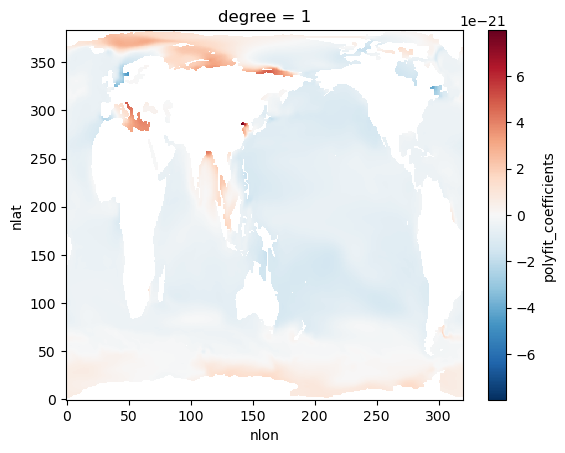

In [36]:
d18O_all_slope['polyfit_coefficients'][0].plot()

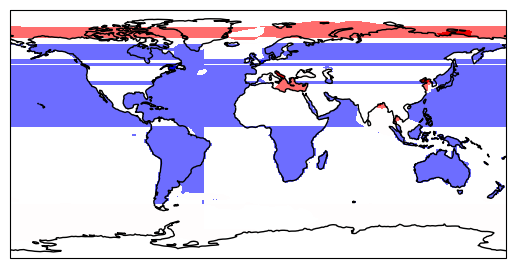

In [42]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
lons, lats, data = d18O_all['TLONG'], d18O_all['TLAT'] , d18O_all_slope['polyfit_coefficients'][0]
ax.contourf(lons, lats, data, cmap='seismic',transform=ccrs.PlateCarree())

plt.show()

In [38]:
d18O_all

<xarray.DataArray 'R18O' (time: 13872, nlat: 384, nlon: 320)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [-0.39243698, -0.3938079 , -0.39225817, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [-0.39196014, -0.39422512, -0.3924966 , ...,         nan,
                 nan,         nan],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [-0.37515163, -0.37384033, -0.37288666, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]], dtype=float32)
Coordinates:
    z_t      float32 500.0
    ULONG    (nlat, nlon) float64 321.1 322.3 323.4 324.5 ... 319.2 319.6 320.0
    ULAT     (nlat, nlon) float64 -78.95 -78.95 -78.95 ... 72.42 72.41 72.41
    TLONG    (nlat, nlon) float64 320.6 321.7 322.8 323.9 ... 318.9 319.4 319.8
    TLAT     (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 72.2 72.19 72.19
  * time     (time) object 0850-02-01 00:00:00 ... 2006-01-01 00:00:00
Dimensions without coordinates: nlat, nlon

In [17]:
d18O_all['time'][0]

<xarray.DataArray 'time' ()>
array(cftime.DatetimeNoLeap(850, 2, 1, 0, 0, 0, 0, has_year_zero=True),
      dtype=object)
Coordinates:
    z_t      float32 500.0
    time     object 0850-02-01 00:00:00
Attributes:
    long_name:  time
    bounds:     time_bound

In [18]:
def linear_trend(x):
    pf = np.polyfit(np.linspace(0,13871,13872), x, 1)
    return xr.DataArray(pf[0])

In [19]:
stacked = d18O_all.stack(allpoints=['nlat','nlon'])

In [20]:
trend = stacked.groupby('allpoints').apply(linear_trend)

In [21]:
trend_unstacked = trend.unstack('allpoints')

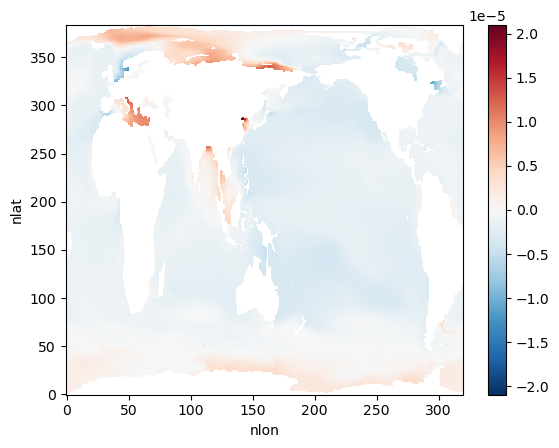

In [22]:
trend_unstacked.plot()

In [23]:
trend_unstacked

<xarray.DataArray (nlat: 384, nlon: 320)>
array([[           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [1.50320014e-06, 1.50671450e-06, 1.51972460e-06, ...,
                   nan,            nan,            nan],
       ...,
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan]])
Coordinates:
  * nlat     (nlat) int64 0 1 2 3 4 5 6 7 8 ... 376 377 378 379 380 381 382 383
  * nlon     (nlon) int64 0 1 2 3 4 5 6 7 8 ... 312 313 314 315 316 317 318 319

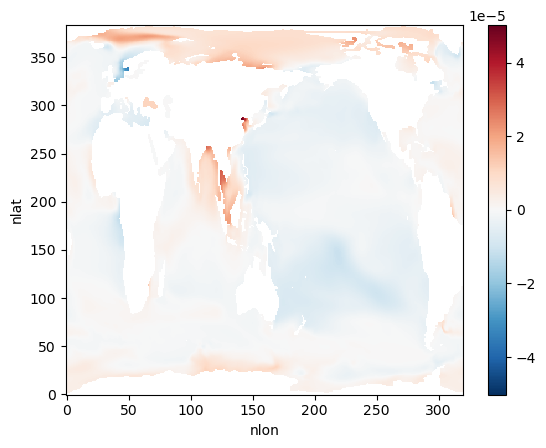

In [24]:
stacked_salt = salt_all.stack(allpoints=['nlat','nlon'])
trend_salt = stacked_salt.groupby('allpoints').apply(linear_trend)
trend_unstacked_salt = trend_salt.unstack('allpoints')
trend_unstacked_salt.plot()

In [25]:
trend_unstacked_salt

<xarray.DataArray (nlat: 384, nlon: 320)>
array([[           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [3.70210988e-06, 3.69978442e-06, 3.69821485e-06, ...,
                   nan,            nan,            nan],
       ...,
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan]])
Coordinates:
  * nlat     (nlat) int64 0 1 2 3 4 5 6 7 8 ... 376 377 378 379 380 381 382 383
  * nlon     (nlon) int64 0 1 2 3 4 5 6 7 8 ... 312 313 314 315 316 317 318 319

In [30]:
trend_unstacked_salt[200][100]

<xarray.DataArray ()>
array(1.68499873e-06)
Coordinates:
    nlat     int64 200
    nlon     int64 100

In [31]:
trend_unstacked_salt['nlat']

<xarray.DataArray 'nlat' (nlat: 384)>
array([  0,   1,   2, ..., 381, 382, 383])
Coordinates:
  * nlat     (nlat) int64 0 1 2 3 4 5 6 7 8 ... 376 377 378 379 380 381 382 383

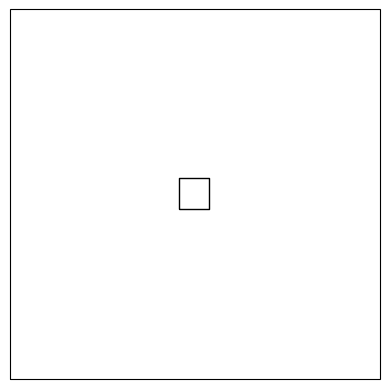

In [34]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
lons, lats, data = trend_unstacked_salt['nlon'], trend_unstacked_salt['nlat'], trend_unstacked_salt
ax.contourf(lons, lats, data, transform=ccrs.PlateCarree())

plt.show()